###### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most

## CLUSTERING ASSIGNMENT

In [532]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [533]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [534]:
#READ THE DATASET
country_df=pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### DATA Understanding

In [535]:
## Let's make a copy of our original data before using it for analysis
df_org = country_df.copy()

In [536]:
#Inspecting various elements of dataset
country_df.shape #No. of rows and cols.

(167, 10)

In [537]:
country_df.info()  #Data types and missing values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [538]:
country_df.describe() #statistical summary of numerial variables

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [539]:
#converting the column values to actula values from relative values of gdpp-exports,health and imports
country_df['exports']=(country_df['exports'] * country_df['gdpp'])/100

In [540]:
country_df['health']=(country_df['health'] * country_df['gdpp'])/100

In [541]:
country_df['imports']=(country_df['imports'] * country_df['gdpp'])/100

In [542]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### EDA

In [543]:
country_df.isnull().sum() #Check if missing values exists in dataset

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

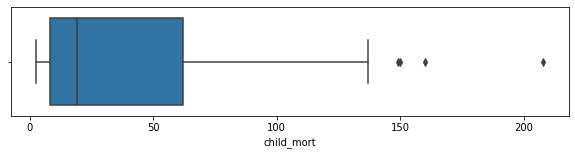

In [544]:
plt.figure(figsize=(10,2))  #Checking presence of outliers for child_mort
sns.boxplot(country_df.child_mort)
plt.show()

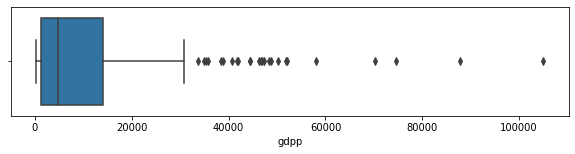

In [545]:
plt.figure(figsize=(10,2)) #Checking presence of outliers for gdpp
sns.boxplot(country_df.gdpp)
plt.show()

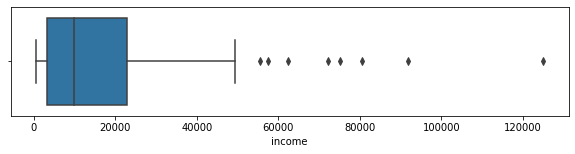

In [546]:
plt.figure(figsize=(10,2)) #Checking presence of outliers for income
sns.boxplot(country_df.income)
plt.show()

#### Bivariate Analysis

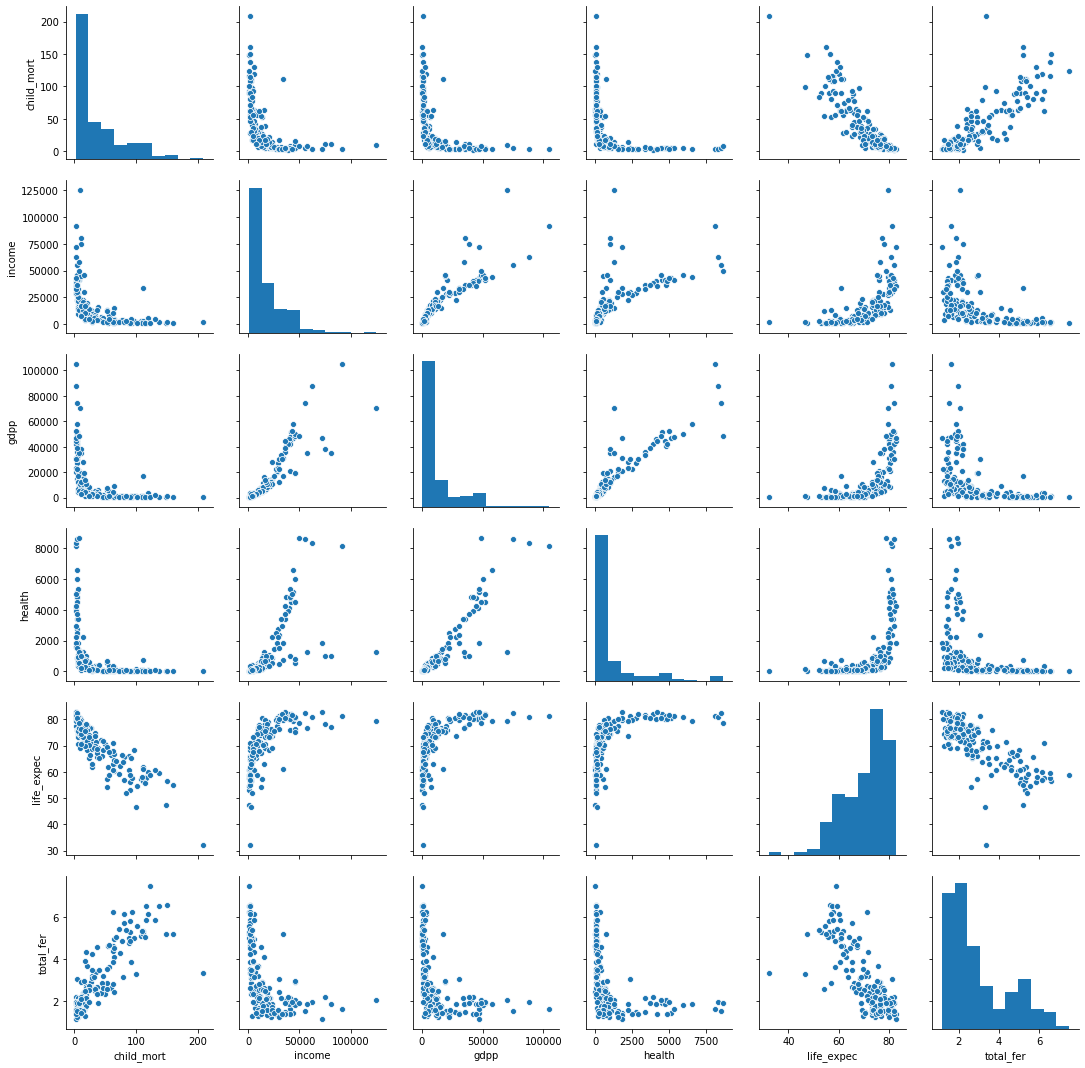

In [547]:
sns.pairplot(data=country_df,vars=['child_mort','income','gdpp','health','life_expec','total_fer'])
plt.show()

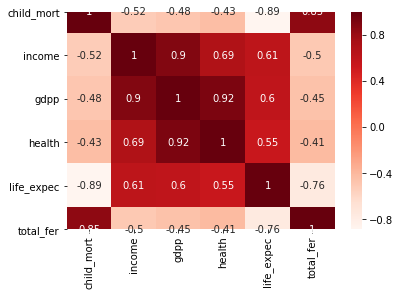

In [548]:
sns.heatmap(country_df[['child_mort','income','gdpp','health','life_expec','total_fer']].corr(),annot=True,cmap="Reds")
plt.show()
#From heatmap we can see that child_mort is highly correlated to life_expec
#Income highly correlated to gdpp
#health highly correlated to gdpp
#total_fert highly correlated to child_mort

In [549]:
#Outlier Treatment-Child_mort col-For values >Q4(0.99 quantile) they should be capped to 0.99 quantile
Q1 = country_df['child_mort'].quantile(0.01)
Q4 = country_df['child_mort'].quantile(0.99)
country_df['child_mort'][country_df['child_mort'] >= Q4]=Q4
country_df.shape

(167, 10)

In [550]:
#Outlier Treatment-gdpp col-For values >Q4(0.99 quantile) they should be capped to 0.99 quantile
Q1 = country_df['gdpp'].quantile(0.01)
Q4 = country_df['gdpp'].quantile(0.99)
country_df['gdpp'][country_df['gdpp'] >= Q4]=Q4
country_df.shape

(167, 10)

In [551]:
#Outlier Treatment-income col-For values >Q4(0.99 quantile) they should be capped to 0.99 quantile
Q1 = country_df['income'].quantile(0.01)
Q4 = country_df['income'].quantile(0.99)
country_df['income'][country_df['income'] >= Q4]=Q4
country_df.shape

(167, 10)

In [552]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


### Clustering

In [554]:
#Hopkin's statistic to find out how well the data can be clustered

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [555]:
#Drop Country column 


country_df=country_df.drop('country', axis = 1)


In [556]:
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [557]:
# Now, we need to create a ID columns, without this we will not be able to make necessary conclusions or we will not be able to
# identify that which observation goes to which cluster
country_df['ID'] = country_df.index+100
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,100
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,101
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,102
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,103
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,104


In [558]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_df)

0.8616851110574082

In [559]:
# Now for perfroming scaling, we need to again drop the ID column, Let's drop it
country_df1 = country_df.drop('ID', axis = 1)

In [560]:
# Check the shape of the resultant data
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [561]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_df1 = standard_scaler.fit_transform(country_df1)

In [562]:
country_df1.dtype

dtype('float64')

In [563]:
country_df1 = pd.DataFrame(country_df1)
country_df1.columns = ["child_mort", "exports", "health", "imports","income","inflation","life_expec","total_fer","gdpp"]
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.411011,-0.565040,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.547497,-0.350191,-0.439218,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272510,-0.318526,-0.484826,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.084159,-0.291375,-0.532363,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.709406,-0.104331,-0.178771,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042


### K-Means Clustering

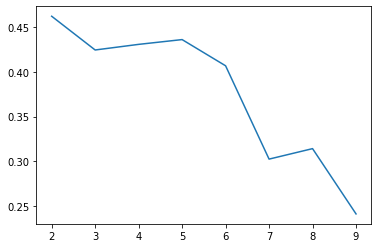

In [564]:
#Silhouette Score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

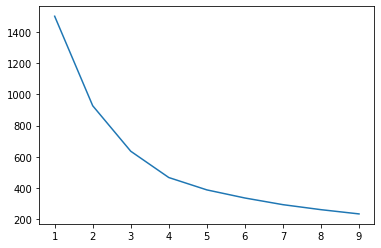

In [565]:
#Elbow Curve/SSD
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [566]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=100,random_state = 100)
kmeans.fit(country_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [567]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [399]:
## Let's make a copy of our original data before using it for analysis
#df_org = country_df.copy()

In [568]:
col = country_df.columns
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ID'],
      dtype='object')

In [569]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([country_df.reset_index().drop('index', axis = 1), pd.Series(kmeans.labels_)], axis = 1)
df_km.columns = [ 'child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp','ID','cluster_id']
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,100,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,101,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,102,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,103,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,104,0


In [570]:
# Cross-check for Null values
df_km.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ID            0
cluster_id    0
dtype: int64

In [571]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

0    125
2     28
1     13
3      1
Name: cluster_id, dtype: int64

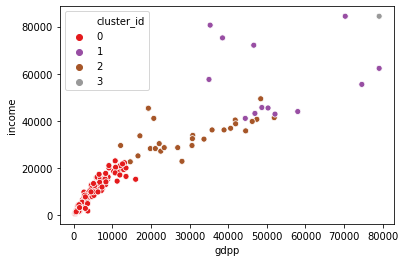

In [572]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

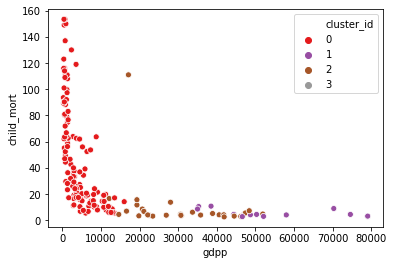

In [573]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

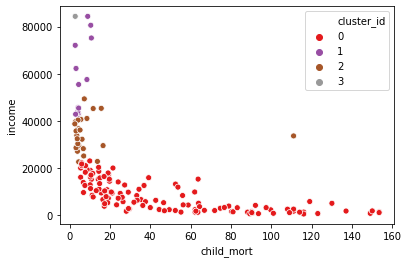

In [574]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

### Cluster profiling

In [575]:
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,100,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,101,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,102,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,103,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,104,0


In [576]:
df_km.drop('ID', axis = 1).groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,47.812800,1720.635580,274.112281,1904.163217,8154.904000,9.041232,67.681600,3.297200,4198.512000
1,5.692308,37998.669231,4255.120000,29434.015385,57698.000000,4.476385,79.984615,1.815385,52291.384615
2,9.875000,12372.542857,2811.976786,11803.292857,34335.714286,3.842821,78.625000,1.961786,30239.285714
3,2.800000,183750.000000,8158.500000,149100.000000,84374.000000,3.620000,81.300000,1.630000,79088.000000


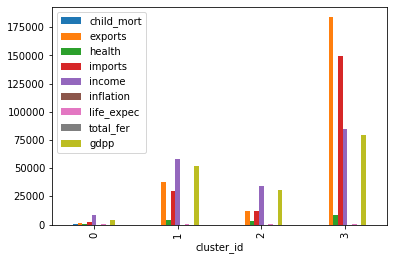

In [577]:
df_km.drop('ID', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

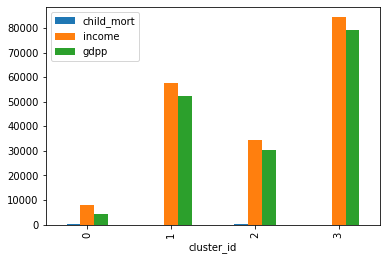

In [578]:
df_km.drop('ID', axis = 1)[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [579]:
#For cluster=0 we are sorting the records with High child_mort,Low Icnome and Low gdpp and top 5 countries are in direst
#NEED FOR AID
df_km[df_km['cluster_id']==0].sort_values(by=["child_mort", "income","gdpp"], ascending=[False, True,True]) 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
132,153.4,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,232,0
66,153.4,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,166,0
32,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,132,0
31,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,131,0
97,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,197,0
...,...,...,...,...,...,...,...,...,...,...,...
90,6.1,7836.000,844.8000,8064.000,21100.0,2.380,73.2,1.50,12000.0,190,0
121,6.0,5052.600,939.9600,5304.600,21800.0,1.660,76.3,1.41,12600.0,221,0
67,6.0,10715.800,960.2300,10021.500,22300.0,2.330,74.5,1.25,13100.0,167,0
14,5.5,3099.420,338.2830,3889.350,16200.0,15.100,70.4,1.49,6030.0,114,0


### Hierarchical Clustering

In [580]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [581]:
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.411011,-0.565040,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.547497,-0.350191,-0.439218,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272510,-0.318526,-0.484826,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.084159,-0.291375,-0.532363,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.709406,-0.104331,-0.178771,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042


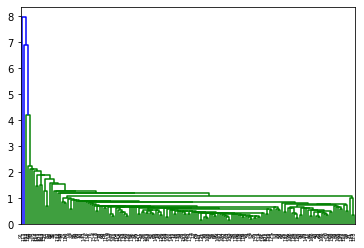

In [582]:
# single linkage
mergings = linkage(country_df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

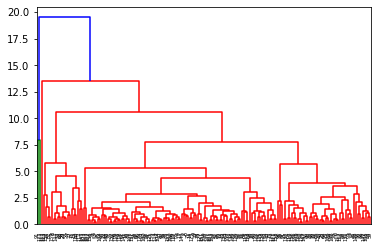

In [583]:
# complete linkage
mergings = linkage(country_df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [584]:
# Total=4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [585]:
# assign cluster labels
df_km['cluster_labels'] = cluster_labels
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id,cluster_labels
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,100,0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,101,0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,102,0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,103,0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,104,0,0


In [586]:
# Check the count of observation per cluster
df_km['cluster_labels'].value_counts()

0    144
1     20
2      2
3      1
Name: cluster_labels, dtype: int64

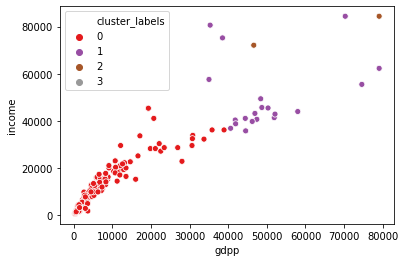

In [587]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_labels', legend = 'full', data = df_km, palette='Set1')

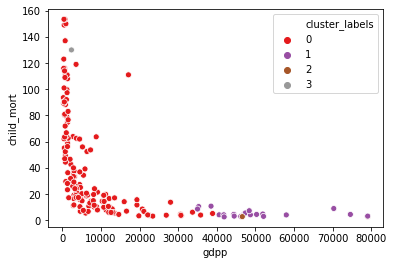

In [588]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_km, palette='Set1')

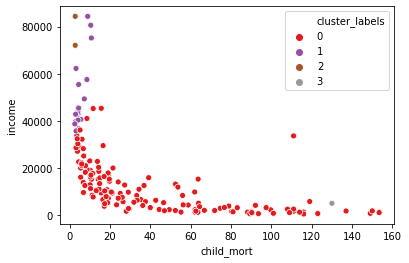

In [589]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_labels', legend = 'full', data = df_km, palette='Set1')

#### Cluster Profiling

In [590]:
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id,cluster_labels
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,100,0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,101,0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,102,0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,103,0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,104,0,0


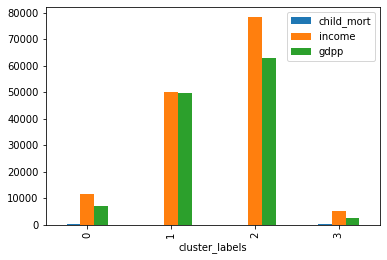

In [591]:
df_km.drop('ID', axis = 1)[['child_mort','income','gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [592]:
#For cluster=0 we are sorting the records with High child_mort,Low Income and Low gdpp and top5 countries are in direst
#NEED FOR AID
df_km[df_km['cluster_labels']==0].sort_values(by=["child_mort", "income","gdpp"], ascending=[False, True,True]) 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id,cluster_labels
132,153.4,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,232,0,0
66,153.4,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,166,0,0
32,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,132,0,0
31,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,131,0,0
97,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,197,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,3.9,5944.900,2770.7000,8258.300,28700.0,0.673,80.4,1.48,26900.0,160,2,0
139,3.8,7828.500,2928.7800,8227.600,32500.0,0.160,81.9,1.37,30700.0,239,2,0
42,3.6,15461.600,1838.7600,17710.000,33900.0,2.010,79.9,1.42,30800.0,142,2,0
43,3.4,13068.000,1560.2400,12454.200,28300.0,-1.430,77.5,1.51,19800.0,143,2,0


In [593]:
#For cluster=3 we have only one record but since its mean() less than cluster 0 we just checked that if it comes in top 5 
#but after comparing child_mort,income and gdpp we found that its not a candidate for AID
df_km[df_km['cluster_labels']==3].sort_values(by=["child_mort", "income","gdpp"], ascending=[False, True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id,cluster_labels
113,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,213,0,3


In [594]:
df_org['country'].iloc[132]

'Sierra Leone'

In [595]:
df_org['country'].iloc[66]

'Haiti'

In [596]:
df_org['country'].iloc[32]

'Chad'

In [597]:
df_org['country'].iloc[31]

'Central African Republic'

In [598]:
df_org['country'].iloc[97]

'Mali'

###### CONCLUSION:
So the five countries that Need Aid are Sierra Leone,Haiti,Chad,Central African Republic and Mali